# Exploratory Data Analysis (EDA) - Credit Risk Model

This notebook contains comprehensive exploratory data analysis for the credit risk modeling project.

## Objectives
- Overview of the Data
- Summary Statistics
- Distribution Analysis (Numerical & Categorical)
- Correlation Analysis
- Missing Value Identification
- Outlier Detection
- Key Insights Summary


## 1. Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10


## 2. Load Data


In [2]:
# Load the dataset
data_path = Path('../data/raw/credit_data.csv')

if data_path.exists():
    df = pd.read_csv(data_path)
    print(f"✓ Data loaded successfully: {df.shape[0]:,} rows, {df.shape[1]} columns")
    print(f"✓ Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
else:
    print(f"✗ Data file not found at {data_path}")
    print("Please ensure your data file is in the data/raw/ directory")


✓ Data loaded successfully: 95,662 rows, 16 columns
✓ Memory usage: 66.48 MB


## 1. Overview of the Data

Inspect dataset shape, column names, and data types.


In [3]:
# Dataset Shape
print("="*70)
print("DATASET SHAPE")
print("="*70)
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")
print()

# Column Names and Data Types
print("="*70)
print("COLUMN NAMES AND DATA TYPES")
print("="*70)
print(df.dtypes)
print()

# Display first few rows
print("="*70)
print("FIRST FEW ROWS")
print("="*70)
print(df.head(10))
print()

# Display last few rows
print("="*70)
print("LAST FEW ROWS")
print("="*70)
print(df.tail(5))
print()

# Basic Info
print("="*70)
print("DATASET INFO")
print("="*70)
df.info()


DATASET SHAPE
Rows: 95,662
Columns: 16

COLUMN NAMES AND DATA TYPES
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

FIRST FEW ROWS
          TransactionId         BatchId       AccountId       SubscriptionId  \
0   TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1   TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2   TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3     TransactionId_380  BatchId_102363   AccountId_648  SubscriptionI

## 2. Summary Statistics

Generate descriptive statistics for numerical and categorical fields.


In [4]:
# Identify numerical and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("="*70)
print("NUMERICAL FEATURES SUMMARY STATISTICS")
print("="*70)
if len(numeric_cols) > 0:
    print(df[numeric_cols].describe())
    print()
    print("Additional Statistics:")
    print(f"Skewness:\n{df[numeric_cols].skew()}")
    print()
    print(f"Kurtosis:\n{df[numeric_cols].kurtosis()}")
else:
    print("No numerical features found.")
print()

print("="*70)
print("CATEGORICAL FEATURES SUMMARY")
print("="*70)
if len(categorical_cols) > 0:
    for col in categorical_cols:
        print(f"\n{col}:")
        print(f"  Unique values: {df[col].nunique()}")
        print(f"  Most frequent: {df[col].mode().iloc[0] if len(df[col].mode()) > 0 else 'N/A'}")
        print(f"  Frequency of most frequent: {df[col].value_counts().iloc[0] if len(df[col].value_counts()) > 0 else 0}")
else:
    print("No categorical features found.")


NUMERICAL FEATURES SUMMARY STATISTICS
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000

Additional Statistics:
Skewness:
CountryCode         0.000000
Amount             51.098490
Value              51.291086
PricingStrategy     1.659057
FraudResult        22.196295
dtype: float64

Kurtosis:
CountryCode           0.000000
Amount             3363.

## 3. Distribution of Numerical Features

Visualize all numerical feature distributions. Identify skewness, patterns, or unusual behaviors.


Analyzing 4 numerical features...
Features: ['CountryCode', 'Amount', 'Value', 'PricingStrategy']



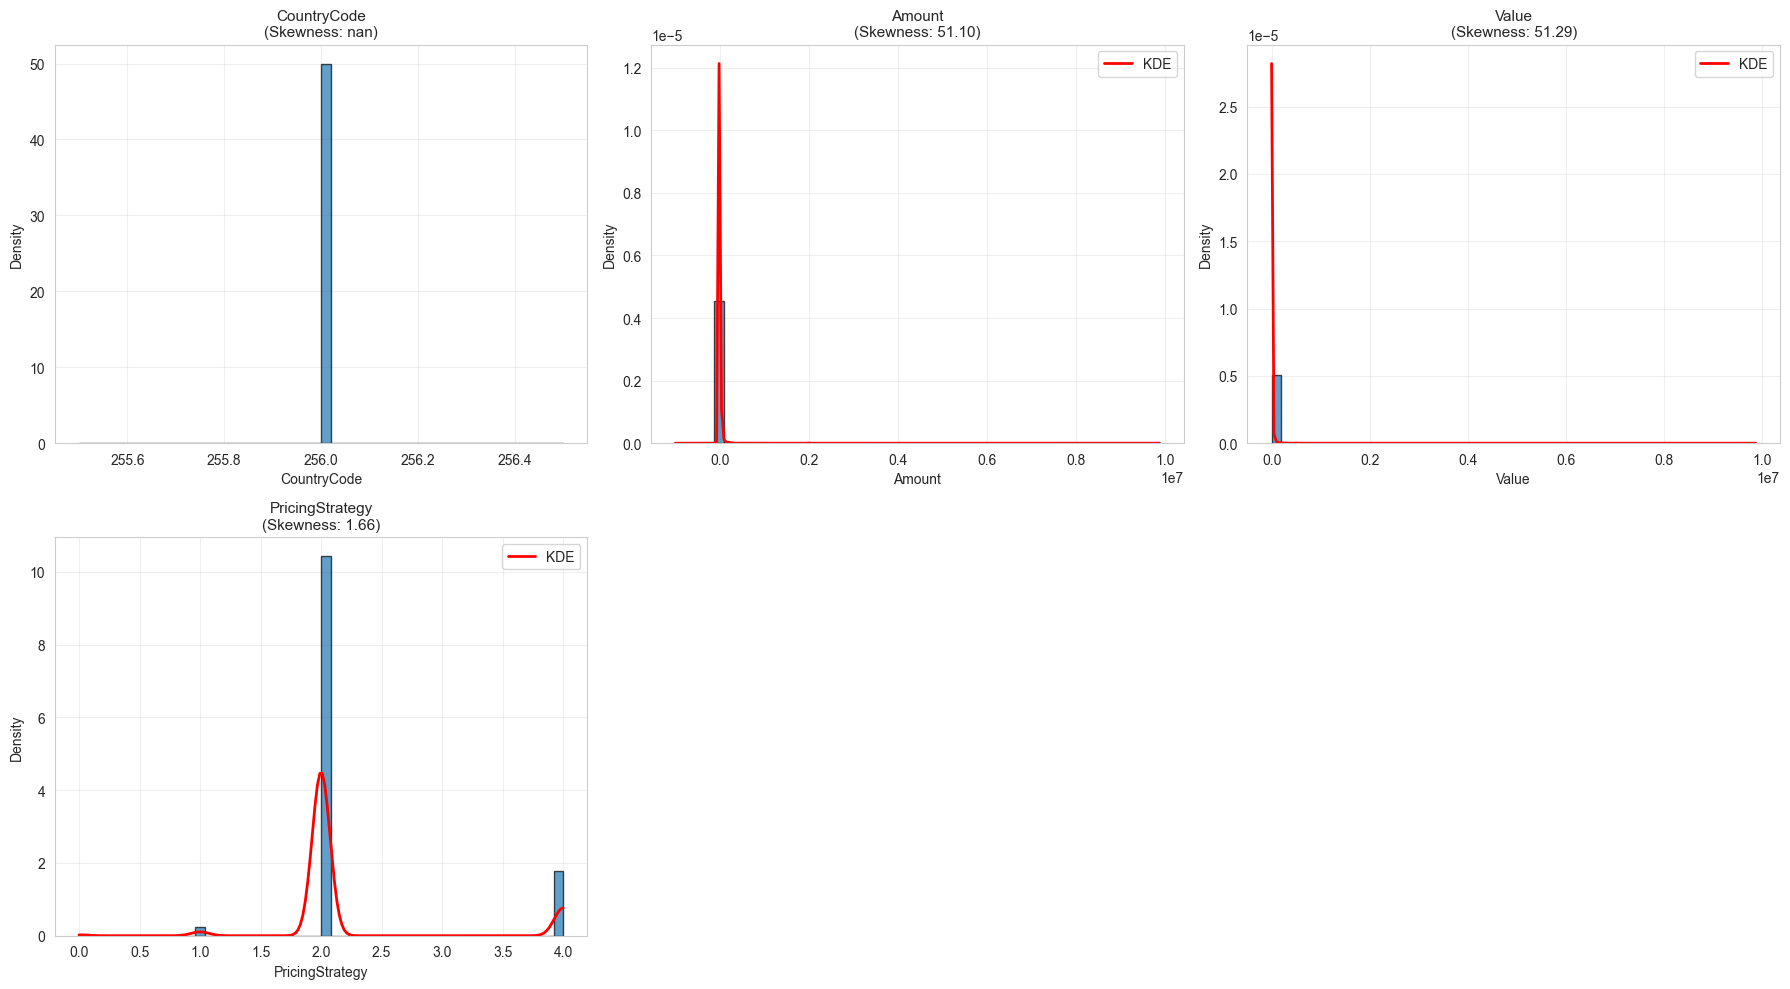

SKEWNESS ANALYSIS
        Feature  Skewness       Interpretation
    CountryCode       NaN Approximately Normal
         Amount 51.097688        Highly Skewed
          Value 51.290282        Highly Skewed
PricingStrategy  1.659031        Highly Skewed


In [5]:
# Identify target variable (FraudResult)
target_col = 'FraudResult' if 'FraudResult' in df.columns else None

# Filter out target and ID columns from numerical features for analysis
numeric_features = [col for col in numeric_cols if col not in ['FraudResult'] and not col.endswith('Id')]

print(f"Analyzing {len(numeric_features)} numerical features...")
print(f"Features: {numeric_features}")
print()

# Distribution plots for all numerical features
if len(numeric_features) > 0:
    n_cols = 3
    n_rows = (len(numeric_features) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1) if len(numeric_features) > 1 else [axes]
    axes = axes.flatten()
    
    for idx, col in enumerate(numeric_features):
        if idx < len(axes):
            # Histogram with KDE
            data = df[col].dropna()
            axes[idx].hist(data, bins=50, edgecolor='black', alpha=0.7, density=True)
            
            # Add KDE curve
            try:
                from scipy.stats import gaussian_kde
                kde = gaussian_kde(data)
                x_range = np.linspace(data.min(), data.max(), 200)
                axes[idx].plot(x_range, kde(x_range), 'r-', linewidth=2, label='KDE')
                axes[idx].legend()
            except:
                pass
            
            # Calculate and display skewness
            skewness = stats.skew(data)
            axes[idx].set_title(f'{col}\n(Skewness: {skewness:.2f})', fontsize=11)
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel('Density')
            axes[idx].grid(True, alpha=0.3)
    
    # Hide extra subplots
    for idx in range(len(numeric_features), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Summary of skewness
    print("="*70)
    print("SKEWNESS ANALYSIS")
    print("="*70)
    skewness_summary = pd.DataFrame({
        'Feature': numeric_features,
        'Skewness': [stats.skew(df[col].dropna()) for col in numeric_features],
        'Interpretation': [('Highly Skewed' if abs(stats.skew(df[col].dropna())) > 1 
                           else 'Moderately Skewed' if abs(stats.skew(df[col].dropna())) > 0.5 
                           else 'Approximately Normal') for col in numeric_features]
    })
    print(skewness_summary.to_string(index=False))
else:
    print("No numerical features found for distribution analysis.")


## 4. Distribution of Categorical Features

Plot counts, category frequencies, and category-level variation.


Analyzing 3 categorical features...
Features: ['CurrencyCode', 'ProductCategory', 'TransactionStartTime']



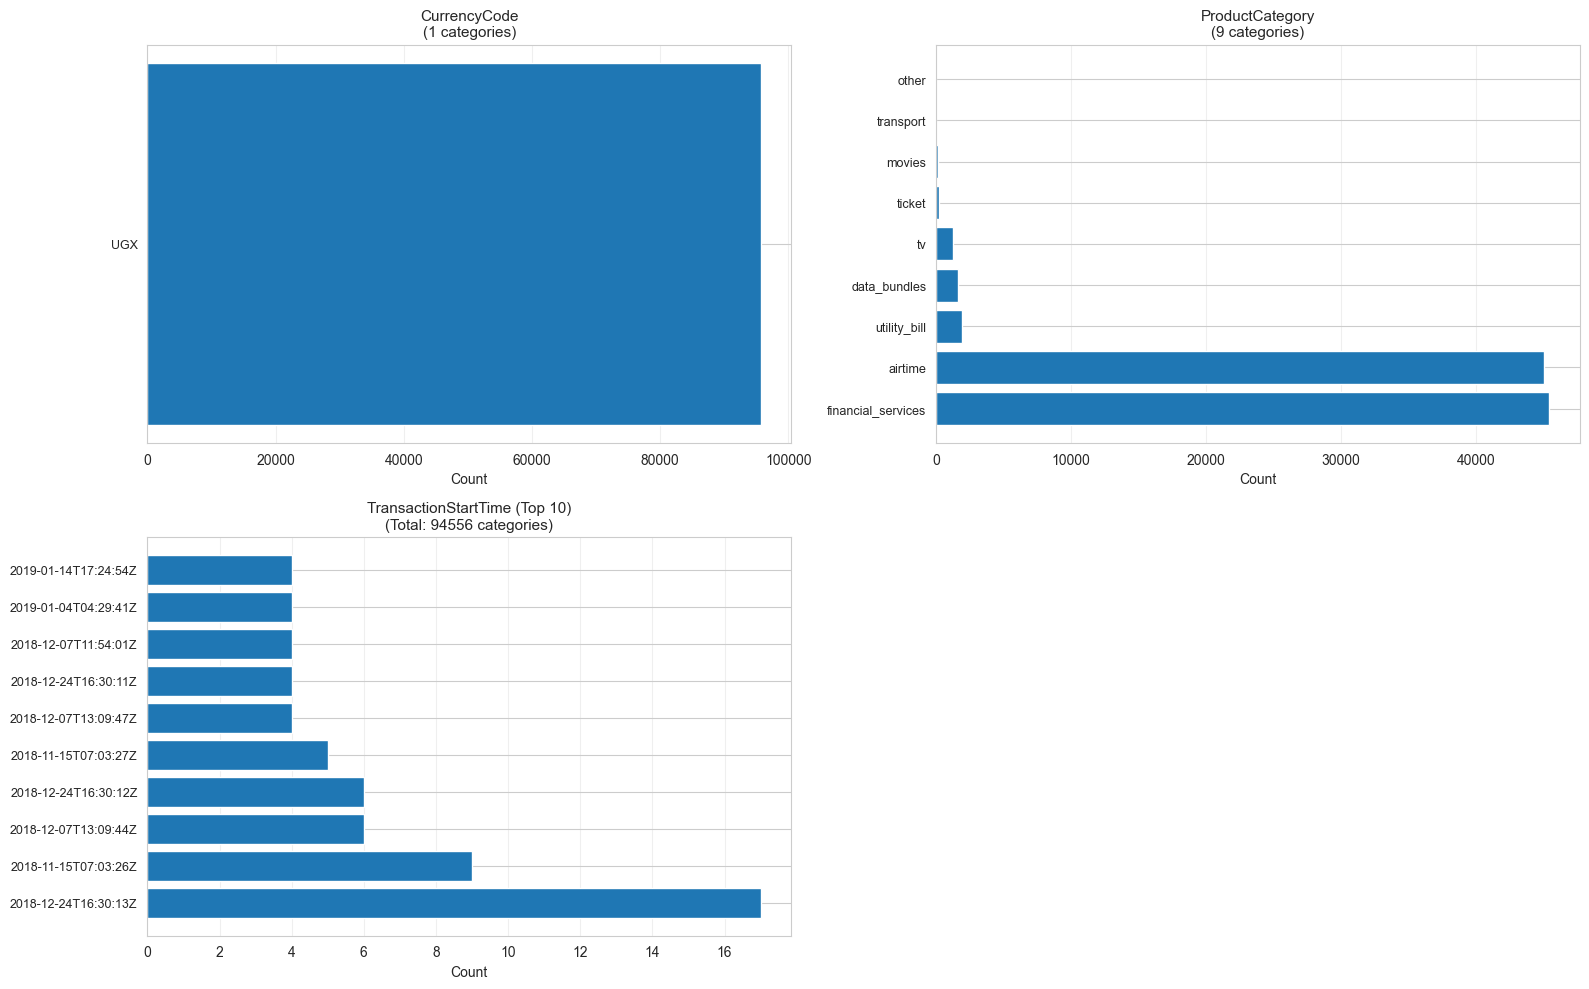

CATEGORICAL FEATURES SUMMARY

CurrencyCode:
  Total categories: 1
  Top 5 categories:
    UGX: 95,662 (100.00%)

ProductCategory:
  Total categories: 9
  Top 5 categories:
    financial_services: 45,405 (47.46%)
    airtime: 45,027 (47.07%)
    utility_bill: 1,920 (2.01%)
    data_bundles: 1,613 (1.69%)
    tv: 1,279 (1.34%)

TransactionStartTime:
  Total categories: 94556
  Top 5 categories:
    2018-12-24T16:30:13Z: 17 (0.02%)
    2018-11-15T07:03:26Z: 9 (0.01%)
    2018-12-07T13:09:44Z: 6 (0.01%)
    2018-12-24T16:30:12Z: 6 (0.01%)
    2018-11-15T07:03:27Z: 5 (0.01%)


In [6]:
# Filter out ID columns from categorical features
categorical_features = [col for col in categorical_cols if not col.endswith('Id')]

print(f"Analyzing {len(categorical_features)} categorical features...")
print(f"Features: {categorical_features}")
print()

if len(categorical_features) > 0:
    # Create subplots for categorical features
    n_cols = 2
    n_rows = (len(categorical_features) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1) if len(categorical_features) > 1 else [axes]
    axes = axes.flatten()
    
    for idx, col in enumerate(categorical_features):
        if idx < len(axes):
            value_counts = df[col].value_counts()
            
            # Limit to top 10 categories if too many
            if len(value_counts) > 10:
                top_values = value_counts.head(10)
                axes[idx].barh(range(len(top_values)), top_values.values)
                axes[idx].set_yticks(range(len(top_values)))
                axes[idx].set_yticklabels(top_values.index, fontsize=9)
                axes[idx].set_title(f'{col} (Top 10)\n(Total: {df[col].nunique()} categories)', fontsize=11)
            else:
                axes[idx].barh(range(len(value_counts)), value_counts.values)
                axes[idx].set_yticks(range(len(value_counts)))
                axes[idx].set_yticklabels(value_counts.index, fontsize=9)
                axes[idx].set_title(f'{col}\n({df[col].nunique()} categories)', fontsize=11)
            
            axes[idx].set_xlabel('Count')
            axes[idx].grid(True, alpha=0.3, axis='x')
    
    # Hide extra subplots
    for idx in range(len(categorical_features), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Category frequency summary
    print("="*70)
    print("CATEGORICAL FEATURES SUMMARY")
    print("="*70)
    for col in categorical_features:
        print(f"\n{col}:")
        value_counts = df[col].value_counts()
        print(f"  Total categories: {df[col].nunique()}")
        print(f"  Top 5 categories:")
        for cat, count in value_counts.head(5).items():
            pct = (count / len(df)) * 100
            print(f"    {cat}: {count:,} ({pct:.2f}%)")
else:
    print("No categorical features found for distribution analysis.")


## 5. Correlation Analysis

Compute and visualize correlations between numerical fields.


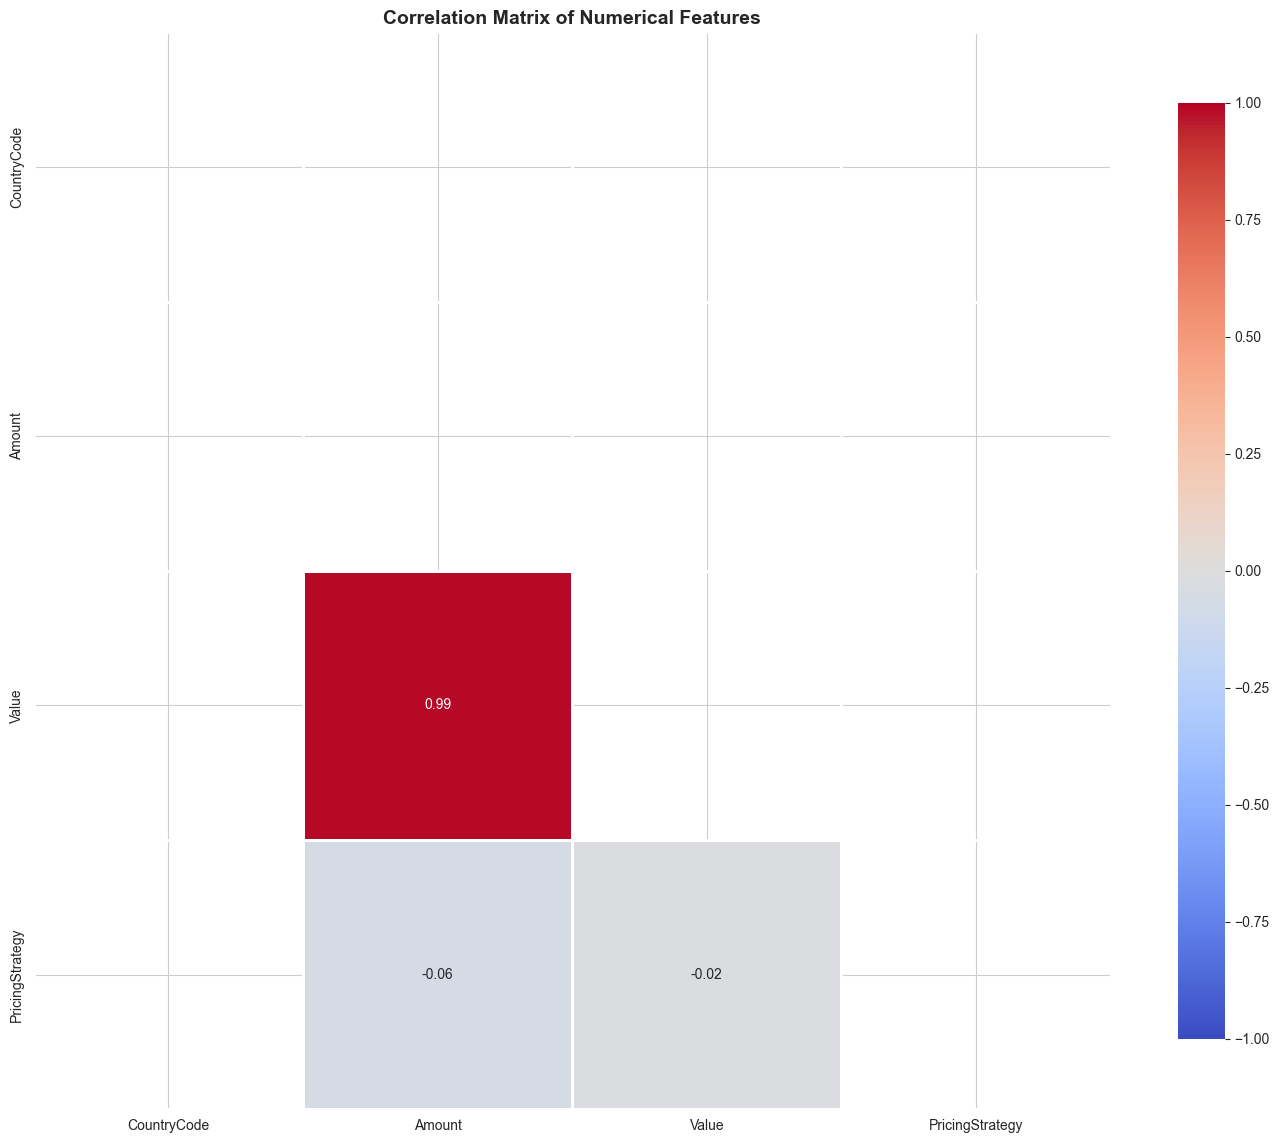

HIGHLY CORRELATED FEATURE PAIRS (|r| > 0.7)
Feature 1 Feature 2  Correlation
   Amount     Value     0.989692


In [7]:
# Correlation analysis for numerical features
if len(numeric_features) > 0:
    # Include target variable if it exists and is numerical
    corr_features = numeric_features.copy()
    if target_col and target_col in df.columns and df[target_col].dtype in [np.number]:
        corr_features.append(target_col)
    
    # Compute correlation matrix
    corr_matrix = df[corr_features].corr()
    
    # Visualize correlation matrix
    plt.figure(figsize=(14, 12))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
                vmin=-1, vmax=1)
    plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Correlation with target variable (if available)
    if target_col and target_col in df.columns and df[target_col].dtype in [np.number]:
        print("="*70)
        print("CORRELATION WITH TARGET VARIABLE (FraudResult)")
        print("="*70)
        target_corr = corr_matrix[target_col].drop(target_col).sort_values(ascending=False, key=abs)
        target_corr_df = pd.DataFrame({
            'Feature': target_corr.index,
            'Correlation': target_corr.values,
            'Abs_Correlation': target_corr.values.abs()
        })
        print(target_corr_df.to_string(index=False))
        print()
        
        # Visualize correlations with target
        plt.figure(figsize=(10, 6))
        colors = ['red' if x < 0 else 'blue' for x in target_corr.values]
        plt.barh(range(len(target_corr)), target_corr.values, color=colors)
        plt.yticks(range(len(target_corr)), target_corr.index)
        plt.xlabel('Correlation Coefficient')
        plt.title('Feature Correlations with Target Variable (FraudResult)')
        plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
        plt.grid(True, alpha=0.3, axis='x')
        plt.tight_layout()
        plt.show()
    
    # Identify highly correlated feature pairs
    print("="*70)
    print("HIGHLY CORRELATED FEATURE PAIRS (|r| > 0.7)")
    print("="*70)
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:
                high_corr_pairs.append({
                    'Feature 1': corr_matrix.columns[i],
                    'Feature 2': corr_matrix.columns[j],
                    'Correlation': corr_val
                })
    
    if high_corr_pairs:
        high_corr_df = pd.DataFrame(high_corr_pairs)
        print(high_corr_df.to_string(index=False))
    else:
        print("No highly correlated pairs found (|r| > 0.7).")
else:
    print("No numerical features available for correlation analysis.")


## 6. Missing Value Identification

Assess missingness across all features and summarize findings.


In [8]:
# Comprehensive missing value analysis
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

print("="*70)
print("MISSING VALUE ANALYSIS")
print("="*70)

if len(missing_df) > 0:
    print(f"\nTotal columns with missing values: {len(missing_df)}")
    print(f"Total missing values: {missing_df['Missing Count'].sum():,}")
    print(f"Overall missing percentage: {(missing_df['Missing Count'].sum() / (len(df) * len(df.columns))) * 100:.2f}%")
    print()
    print("Missing Values by Column:")
    print(missing_df.to_string(index=False))
    
    # Visualize missing values
    plt.figure(figsize=(12, max(6, len(missing_df) * 0.5)))
    bars = plt.barh(missing_df['Column'], missing_df['Missing Percentage'], color='coral')
    plt.xlabel('Missing Percentage (%)', fontsize=12)
    plt.ylabel('Columns', fontsize=12)
    plt.title('Missing Values by Column', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='x')
    
    # Add value labels on bars
    for i, (idx, row) in enumerate(missing_df.iterrows()):
        plt.text(row['Missing Percentage'] + 0.5, i, 
                f"{row['Missing Count']:,} ({row['Missing Percentage']:.2f}%)",
                va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Missing value patterns
    print("\n" + "="*70)
    print("MISSING VALUE PATTERNS")
    print("="*70)
    print(f"Columns with >50% missing: {len(missing_df[missing_df['Missing Percentage'] > 50])}")
    print(f"Columns with 10-50% missing: {len(missing_df[(missing_df['Missing Percentage'] >= 10) & (missing_df['Missing Percentage'] <= 50)])}")
    print(f"Columns with <10% missing: {len(missing_df[missing_df['Missing Percentage'] < 10])}")
else:
    print("✓ No missing values found in the dataset.")
    print(f"  All {len(df.columns)} columns are complete.")


MISSING VALUE ANALYSIS
✓ No missing values found in the dataset.
  All 16 columns are complete.


## 7. Outlier Detection

Use box plots and other visualization techniques to highlight outliers.


## 8. Final Summary - Key Insights

Top 3-5 most important insights discovered during EDA.


In [9]:
# Final EDA Summary and Key Insights
print("="*70)
print("EXPLORATORY DATA ANALYSIS - FINAL SUMMARY")
print("="*70)
print()

# Dataset Overview
print("DATASET OVERVIEW:")
print(f"  • Total Records: {len(df):,}")
print(f"  • Total Features: {len(df.columns)}")
print(f"  • Numerical Features: {len(numeric_features)}")
print(f"  • Categorical Features: {len(categorical_features)}")
print()

# Target Variable Analysis
if target_col and target_col in df.columns:
    target_dist = df[target_col].value_counts()
    target_pct = (target_dist / len(df)) * 100
    print("TARGET VARIABLE (FraudResult):")
    print(f"  • Class 0 (No Fraud): {target_dist.get(0, 0):,} ({target_pct.get(0, 0):.2f}%)")
    print(f"  • Class 1 (Fraud): {target_dist.get(1, 0):,} ({target_pct.get(1, 0):.2f}%)")
    print(f"  • Class Imbalance Ratio: {target_dist.get(0, 1) / target_dist.get(1, 1) if target_dist.get(1, 0) > 0 else 'N/A'}:1")
    print()

# Missing Values Summary
total_missing = df.isnull().sum().sum()
missing_cols = (df.isnull().sum() > 0).sum()
print("MISSING VALUES:")
print(f"  • Total Missing Values: {total_missing:,}")
print(f"  • Columns with Missing Values: {missing_cols}")
print(f"  • Overall Completeness: {((len(df) * len(df.columns) - total_missing) / (len(df) * len(df.columns))) * 100:.2f}%")
print()

print("="*70)
print("TOP 5 KEY INSIGHTS")
print("="*70)
print()

# Insight 1: Dataset Size and Structure
print("1. DATASET CHARACTERISTICS")
print("   • The dataset contains", f"{len(df):,}", "transactions with", len(df.columns), "features.")
print("   • Features are split between numerical (transaction amounts, codes) and categorical")
print("     (product categories, channels, currencies).")
print("   • The dataset appears to be transaction-level data with multiple identifiers")
print("     (TransactionId, AccountId, CustomerId, etc.) for tracking.")
print()

# Insight 2: Target Variable Distribution
if target_col and target_col in df.columns:
    fraud_rate = (df[target_col].sum() / len(df)) * 100
    print("2. TARGET VARIABLE DISTRIBUTION")
    print(f"   • Fraud cases represent {fraud_rate:.2f}% of all transactions.")
    if fraud_rate < 5:
        print("   • This indicates a highly imbalanced dataset, which will require special")
        print("     handling techniques (e.g., SMOTE, class weights, stratified sampling).")
    elif fraud_rate < 20:
        print("   • The dataset shows moderate class imbalance, requiring careful")
        print("     model evaluation metrics (precision, recall, F1-score, ROC-AUC).")
    else:
        print("   • The dataset has relatively balanced classes.")
    print()

# Insight 3: Missing Values
if total_missing > 0:
    print("3. DATA QUALITY - MISSING VALUES")
    print(f"   • {missing_cols} column(s) contain missing values totaling {total_missing:,} records.")
    high_missing = missing_df[missing_df['Missing Percentage'] > 10]
    if len(high_missing) > 0:
        print(f"   • {len(high_missing)} column(s) have >10% missing values, which may require")
        print("     imputation strategies or feature engineering.")
    else:
        print("   • Missing values are relatively sparse (<10% per column), suggesting")
        print("     the dataset is generally complete and suitable for modeling.")
    print()
else:
    print("3. DATA QUALITY - MISSING VALUES")
    print("   • No missing values detected in the dataset.")
    print("   • The dataset is complete and ready for modeling without imputation steps.")
    print()

# Insight 4: Feature Distributions and Skewness
if len(numeric_features) > 0:
    print("4. NUMERICAL FEATURE CHARACTERISTICS")
    highly_skewed = [col for col in numeric_features if abs(stats.skew(df[col].dropna())) > 1]
    if len(highly_skewed) > 0:
        print(f"   • {len(highly_skewed)} feature(s) show high skewness (|skew| > 1): {', '.join(highly_skewed)}")
        print("   • These features may benefit from log transformation or other normalization")
        print("     techniques to improve model performance.")
    else:
        print("   • Numerical features show relatively normal distributions with moderate skewness.")
        print("   • Standard scaling should be sufficient for most features.")
    print()

# Insight 5: Outliers
if len(numeric_features) > 0 and 'outlier_df' in locals():
    high_outlier_features = outlier_df[outlier_df['Outlier Percentage'] > 5]
    if len(high_outlier_features) > 0:
        print("5. OUTLIER ANALYSIS")
        print(f"   • {len(high_outlier_features)} feature(s) contain >5% outliers:")
        for _, row in high_outlier_features.iterrows():
            print(f"     - {row['Feature']}: {row['Outlier Percentage']:.2f}% outliers")
        print("   • Outlier treatment (capping, winsorization, or robust scaling) may be")
        print("     necessary to prevent model bias toward extreme values.")
    else:
        print("5. OUTLIER ANALYSIS")
        print("   • Outliers are present but relatively sparse (<5% per feature).")
        print("   • Standard outlier handling techniques should be sufficient.")
    print()

# Additional Insight: Correlation
if len(numeric_features) > 0 and target_col and target_col in df.columns:
    if 'target_corr' in locals():
        strong_corr = target_corr[abs(target_corr) > 0.3]
        if len(strong_corr) > 0:
            print("6. FEATURE-TARGET RELATIONSHIPS")
            print(f"   • {len(strong_corr)} feature(s) show moderate to strong correlation with target:")
            for feat, corr_val in strong_corr.items():
                print(f"     - {feat}: {corr_val:.3f}")
            print("   • These features are likely to be important predictors in the model.")
        else:
            print("6. FEATURE-TARGET RELATIONSHIPS")
            print("   • No strong linear correlations detected between features and target.")
            print("   • Non-linear relationships may exist; consider feature engineering.")
    print()

print("="*70)
print("RECOMMENDATIONS FOR NEXT STEPS")
print("="*70)
print("1. Data Preprocessing:")
print("   • Handle missing values (if any) using appropriate imputation strategies")
print("   • Apply transformations to highly skewed features")
print("   • Address class imbalance using resampling or class weights")
print()
print("2. Feature Engineering:")
print("   • Create interaction features from highly correlated variables")
print("   • Encode categorical variables appropriately")
print("   • Consider temporal features from TransactionStartTime")
print()
print("3. Model Development:")
print("   • Use stratified cross-validation to account for class imbalance")
print("   • Focus on metrics: Precision, Recall, F1-score, ROC-AUC")
print("   • Consider ensemble methods (Random Forest, XGBoost) for imbalanced data")
print()
print("4. Model Evaluation:")
print("   • Use confusion matrix and classification report")
print("   • Plot ROC curve and Precision-Recall curve")
print("   • Consider cost-sensitive learning if fraud detection costs vary")
print()
print("="*70)


EXPLORATORY DATA ANALYSIS - FINAL SUMMARY

DATASET OVERVIEW:
  • Total Records: 95,662
  • Total Features: 16
  • Numerical Features: 4
  • Categorical Features: 3

TARGET VARIABLE (FraudResult):
  • Class 0 (No Fraud): 95,469 (99.80%)
  • Class 1 (Fraud): 193 (0.20%)
  • Class Imbalance Ratio: 494.6580310880829:1

MISSING VALUES:
  • Total Missing Values: 0
  • Columns with Missing Values: 0
  • Overall Completeness: 100.00%

TOP 5 KEY INSIGHTS

1. DATASET CHARACTERISTICS
   • The dataset contains 95,662 transactions with 16 features.
   • Features are split between numerical (transaction amounts, codes) and categorical
     (product categories, channels, currencies).
   • The dataset appears to be transaction-level data with multiple identifiers
     (TransactionId, AccountId, CustomerId, etc.) for tracking.

2. TARGET VARIABLE DISTRIBUTION
   • Fraud cases represent 0.20% of all transactions.
   • This indicates a highly imbalanced dataset, which will require special
     handling t

OUTLIER DETECTION - BOX PLOTS


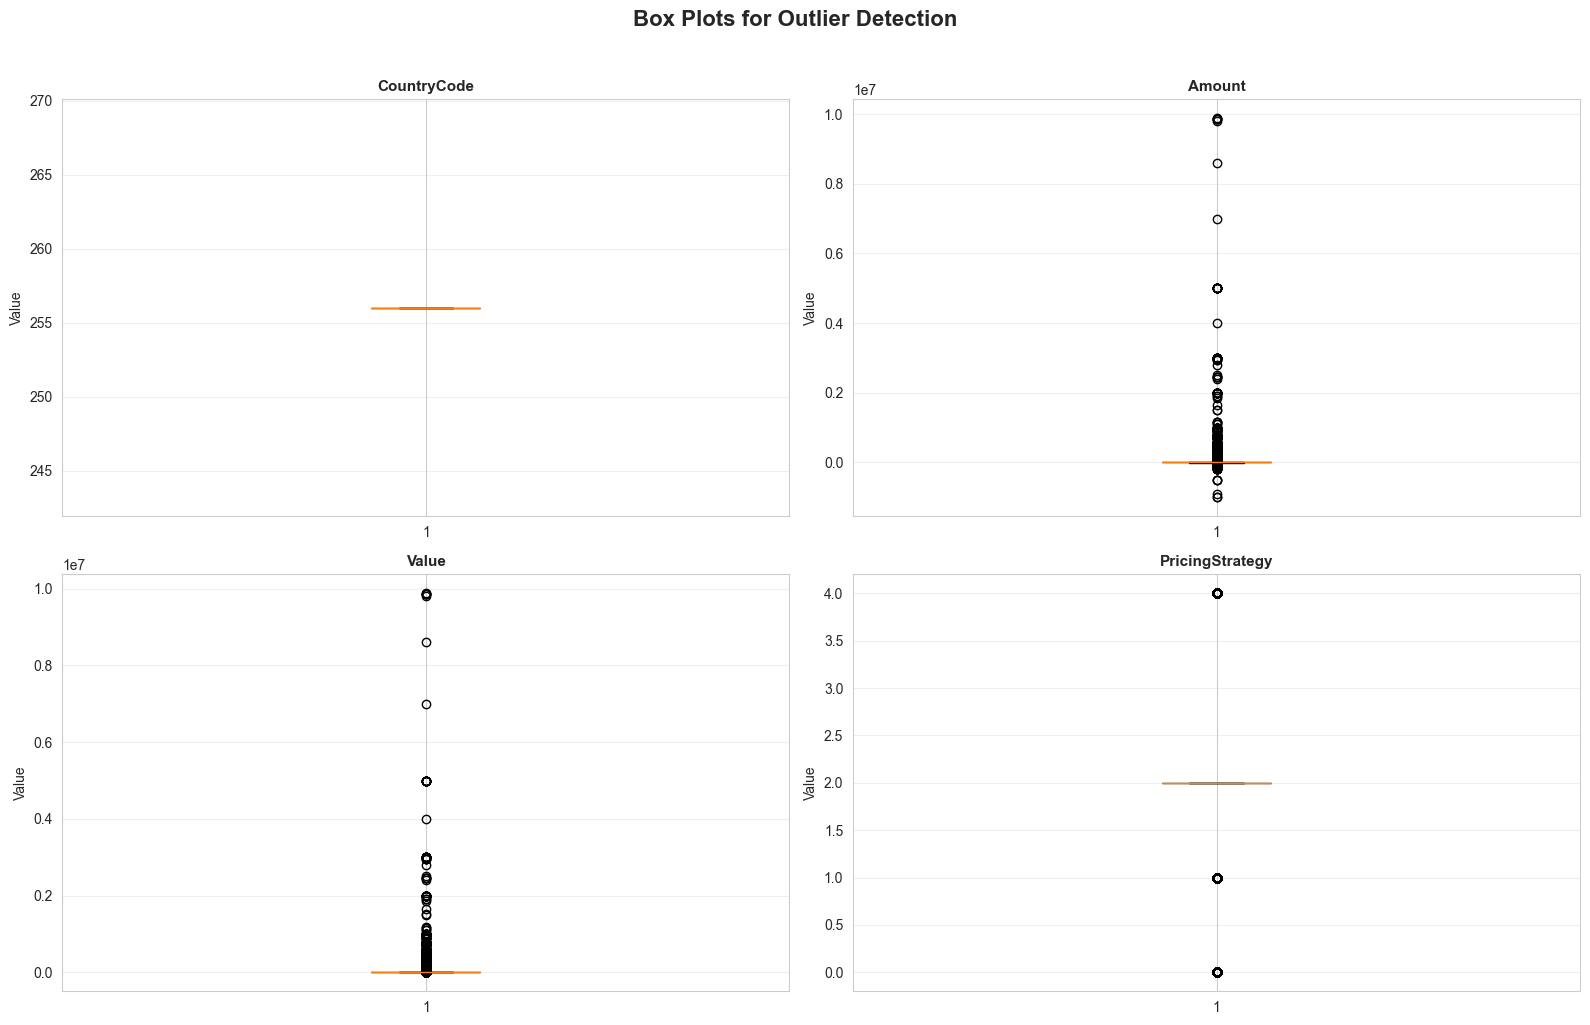


OUTLIER SUMMARY (IQR Method: Q1 - 1.5*IQR to Q3 + 1.5*IQR)
        Feature  Outlier Count  Outlier Percentage  Lower Bound  Upper Bound
    CountryCode              0            0.000000        256.0        256.0
         Amount          24441           25.549330      -4325.0       7075.0
          Value           9021            9.430077      -6812.5      12087.5
PricingStrategy          15814           16.531120          2.0          2.0


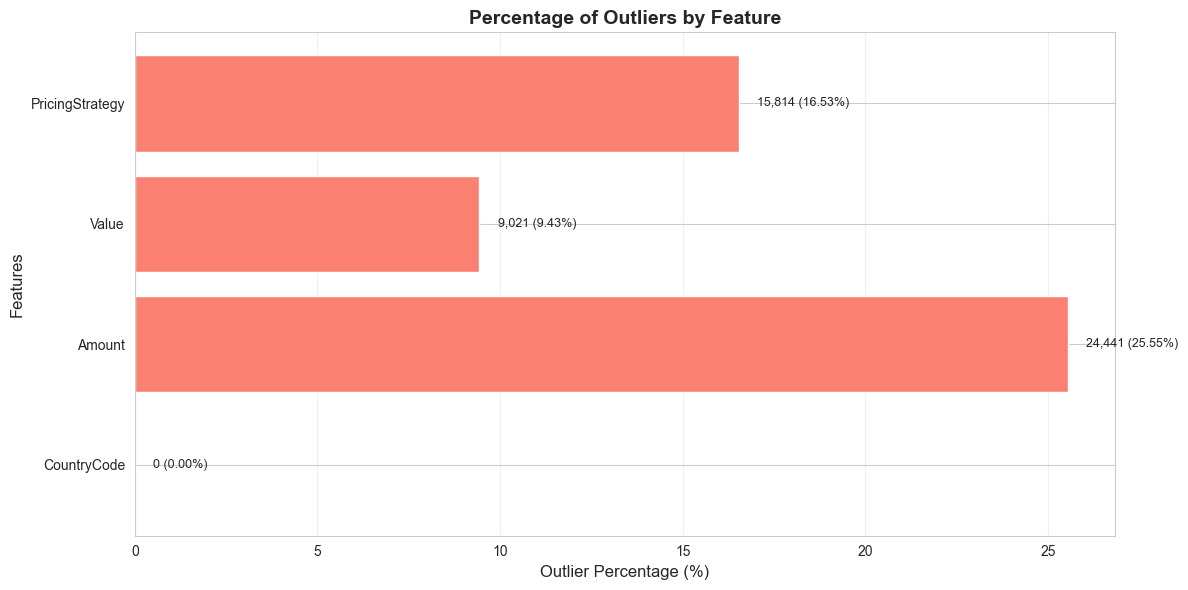

In [10]:
# Outlier detection using box plots and IQR method
if len(numeric_features) > 0:
    print("="*70)
    print("OUTLIER DETECTION - BOX PLOTS")
    print("="*70)
    
    # Create box plots for all numerical features
    n_cols = 2
    n_rows = (len(numeric_features) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1) if len(numeric_features) > 1 else [axes]
    axes = axes.flatten()
    
    outlier_summary = []
    
    for idx, col in enumerate(numeric_features):
        if idx < len(axes):
            data = df[col].dropna()
            
            # Create box plot
            bp = axes[idx].boxplot(data, vert=True, patch_artist=True)
            bp['boxes'][0].set_facecolor('lightblue')
            axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
            axes[idx].set_ylabel('Value')
            axes[idx].grid(True, alpha=0.3, axis='y')
            
            # Calculate outliers using IQR method
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = data[(data < lower_bound) | (data > upper_bound)]
            outlier_count = len(outliers)
            outlier_pct = (outlier_count / len(data)) * 100
            
            outlier_summary.append({
                'Feature': col,
                'Outlier Count': outlier_count,
                'Outlier Percentage': outlier_pct,
                'Lower Bound': lower_bound,
                'Upper Bound': upper_bound
            })
    
    # Hide extra subplots
    for idx in range(len(numeric_features), len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle('Box Plots for Outlier Detection', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Outlier summary table
    print("\n" + "="*70)
    print("OUTLIER SUMMARY (IQR Method: Q1 - 1.5*IQR to Q3 + 1.5*IQR)")
    print("="*70)
    outlier_df = pd.DataFrame(outlier_summary)
    print(outlier_df.to_string(index=False))
    
    # Visualize outlier percentages
    plt.figure(figsize=(12, 6))
    bars = plt.barh(outlier_df['Feature'], outlier_df['Outlier Percentage'], color='salmon')
    plt.xlabel('Outlier Percentage (%)', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title('Percentage of Outliers by Feature', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='x')
    
    # Add value labels
    for i, (idx, row) in enumerate(outlier_df.iterrows()):
        plt.text(row['Outlier Percentage'] + 0.5, i, 
                f"{row['Outlier Count']:,} ({row['Outlier Percentage']:.2f}%)",
                va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
else:
    print("No numerical features available for outlier detection.")
